### Preparing the dataset for model building after the data preprocessing

In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('RUNNING!')

In [2]:
logger.info('Importing Libraries for model building!')

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
final_data=pd.read_csv('Final_Data.csv')

## Model Building

In [5]:
logger.info('DATA PREPARING FOR MODEL BUILDING STARTS!')

In [6]:
X=final_data.drop(['default'],axis=1)
Y=final_data['default']

In [7]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,0,0,0,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,120000.0,2,2,2,26,0,2,0,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,50000.0,1,2,1,57,0,0,0,0,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,191861.368632,178061.760524,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581
46724,20000.0,1,2,1,36,0,0,0,0,0,...,14945.327578,15733.013865,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551
46725,30000.0,2,3,1,31,1,2,2,0,0,...,343.706949,343.706949,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11049.836059,11587.432615,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759


In [8]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default, Length: 46728, dtype: int64

### Train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((37382, 23), (9346, 23), (37382,), (9346,))

### Standarizing the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [13]:
logger.info('DATA PREPARING FOR MODEL BUILDING ENDS!')

In [14]:
logger.info('MODEL BUILDING STARTS!')

In [15]:
def model_report(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1= f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices


## Logistic Regression

In [16]:
logger.info('MODEL - LOGISTIC REGRESSION STARTS!')

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()


Training Accuracy Score:  0.7331603445508533
Testing Accuracy Score:  0.7280119837363578
Precision on test data:  0.7451331394047885
Recall on test data:  0.7035706739911262
F1 score on test data:  0.7237557052814606

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     19908
           1       0.70      0.75      0.72     17474

    accuracy                           0.73     37382
   macro avg       0.73      0.73      0.73     37382
weighted avg       0.74      0.73      0.73     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      4877
           1       0.70      0.75      0.72      4469

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346




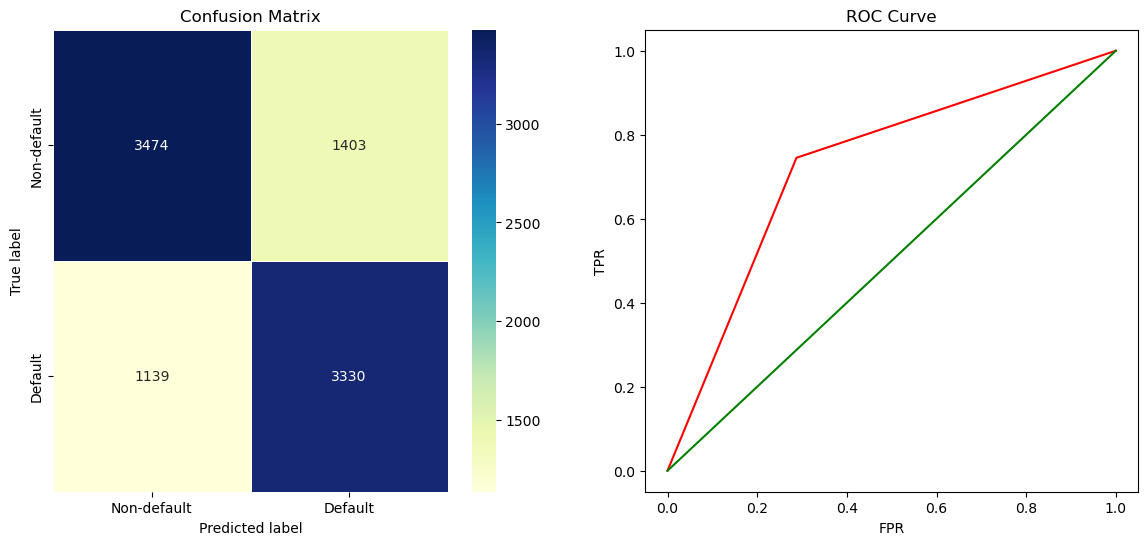

{'Train accuracy': 0.7331603445508533,
 'Test accuracy': 0.7280119837363578,
 'Precision': 0.7451331394047885,
 'Recall': 0.7035706739911262,
 'F1 Score': 0.7237557052814606}

In [20]:
model_report(logreg,X_train_scaled,y_train,X_test_scaled, y_test)

In [21]:
model={}

In [22]:
model['Logisitic Regression']={'Train accuracy': 0.7331603445508533,
 'Test accuracy': 0.7280119837363578,
 'Precision': 0.7451331394047885,
 'Recall': 0.7035706739911262,
 'F1 Score': 0.7237557052814606}

### Hyperparamter Tuning

In [23]:
log_param_dict={'C': range(1,7,1),
                'penalty': ['l1','l2']}


In [24]:
grid_log = RandomizedSearchCV(logreg, log_param_dict, cv=5, scoring='f1', verbose=1)

In [25]:
grid_log.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': range(1, 7),
                                        'penalty': ['l1', 'l2']},
                   scoring='f1', verbose=1)


Training Accuracy Score:  0.7331335937082019
Testing Accuracy Score:  0.7281189813824096
Precision on test data:  0.7452999104744852
Recall on test data:  0.7035706739911262
F1 score on test data:  0.7238343658298011

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     19909
           1       0.70      0.75      0.72     17473

    accuracy                           0.73     37382
   macro avg       0.73      0.73      0.73     37382
weighted avg       0.74      0.73      0.73     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      4878
           1       0.70      0.75      0.72      4468

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346




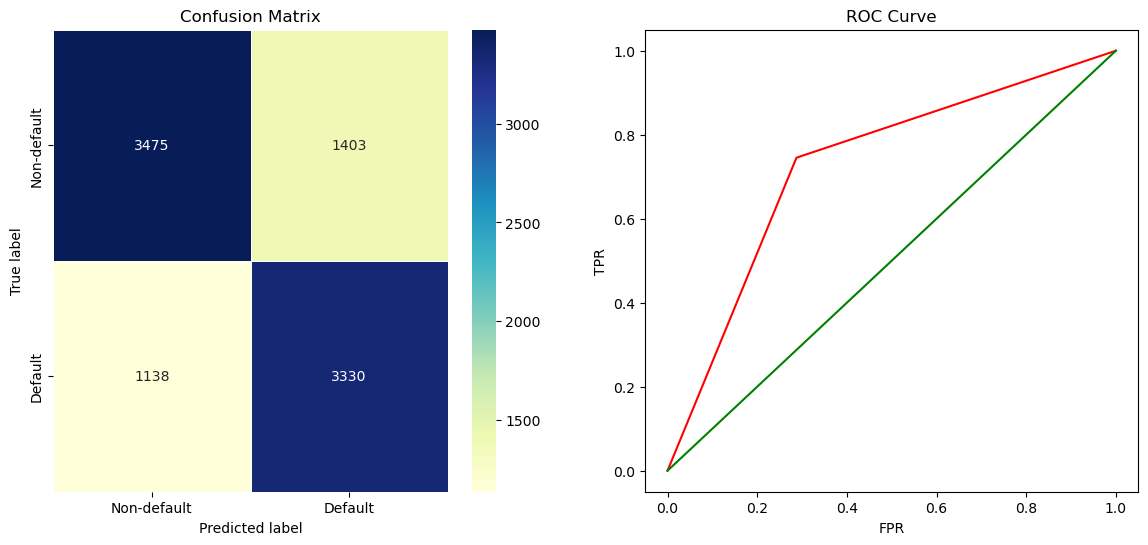

{'Train accuracy': 0.7331335937082019,
 'Test accuracy': 0.7281189813824096,
 'Precision': 0.7452999104744852,
 'Recall': 0.7035706739911262,
 'F1 Score': 0.7238343658298011}

In [26]:
model_report(grid_log,X_train_scaled,y_train,X_test_scaled, y_test)

#### when we apply the hyperparameter tuning thier no much differnce in training and testing accuracy and also with the F1 score , so we will try build the model with the default paramters


In [27]:
logger.info('MODEL - LOGISTIC REGRESSION ENDS!')

## Decision Tree

In [28]:
logger.info('MODEL - DECISION TREE STARTS!')

In [29]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()


Training Accuracy Score:  0.9991439730351506
Testing Accuracy Score:  0.7065054568799486
Precision on test data:  0.6994787489975942
Recall on test data:  0.7371645890555673
F1 score on test data:  0.7178273840139903

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18765
           1       1.00      1.00      1.00     18617

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4358
           1       0.74      0.70      0.72      4988

    accuracy                           0.71      9346
   macro avg       0.71      0.71      0.71      9346
weighted avg       0.71      0.71      0.71      9346




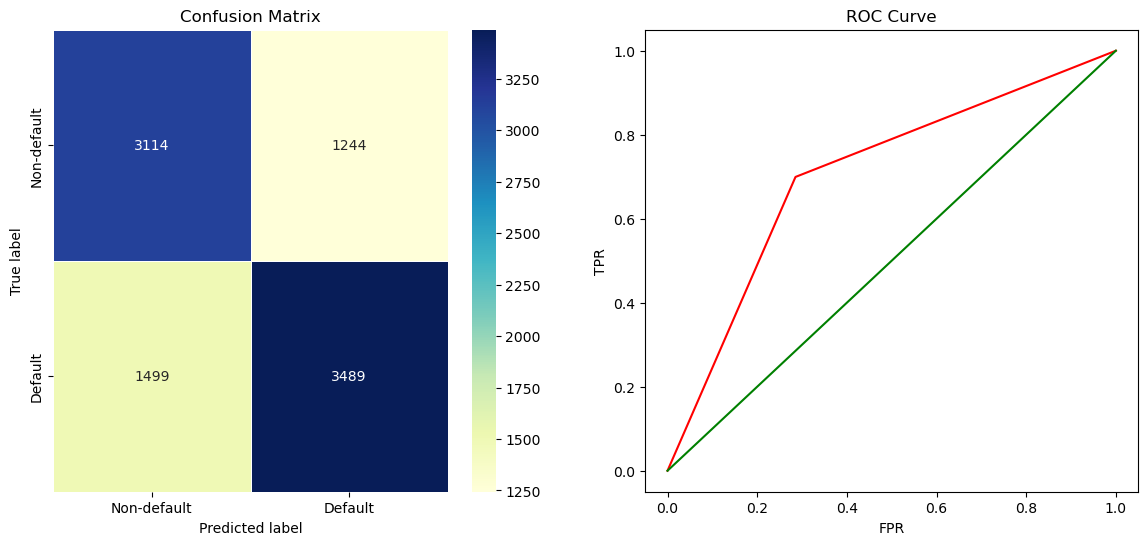

{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.7065054568799486,
 'Precision': 0.6994787489975942,
 'Recall': 0.7371645890555673,
 'F1 Score': 0.7178273840139903}

In [30]:
model_report(DT_classifier,X_train_scaled,y_train,X_test_scaled, y_test)

In [31]:
model['Decision Tree']={'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.7065054568799486,
 'Precision': 0.6994787489975942,
 'Recall': 0.7371645890555673,
 'F1 Score': 0.7178273840139903}


In [32]:
logger.info('MODEL - DECISION TREE ENDS!')

## RANDOM FOREST

In [33]:
logger.info('MODEL - RANDOM FOREST STARTS!')

In [34]:
RF_classifier=RandomForestClassifier()
RF_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9991439730351506
Testing Accuracy Score:  0.7953135031029317
Precision on test data:  0.7803180914512923
Recall on test data:  0.829283752376928
F1 score on test data:  0.8040561302878214

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18739
           1       1.00      1.00      1.00     18643

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      4316
           1       0.83      0.78      0.80      5030

    accuracy                           0.80      9346
   macro avg       0.79      0.80      0.79      9346
weighted avg       0.80      0.80      0.80      9346




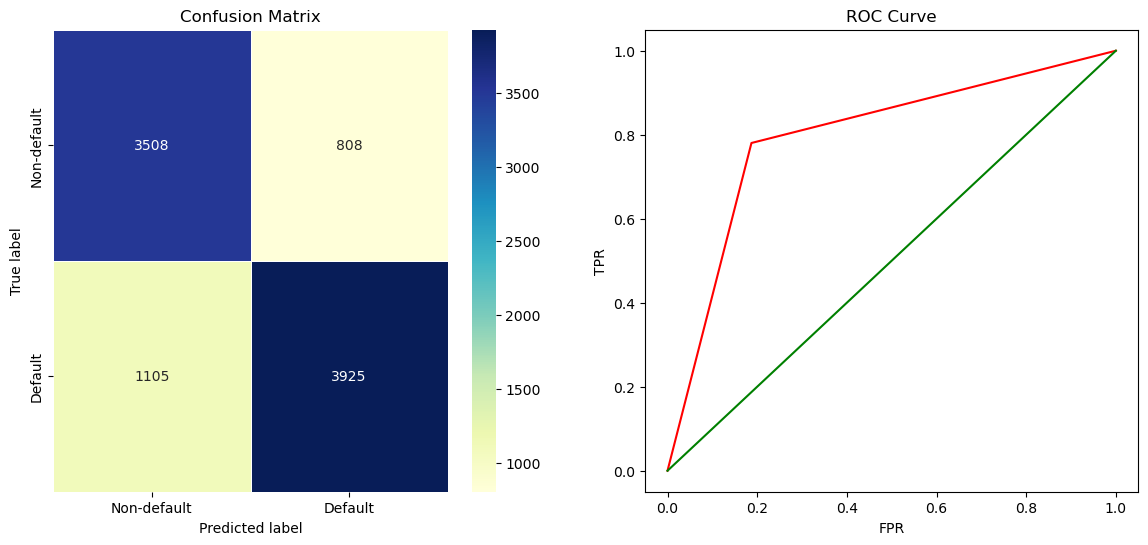

{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.7953135031029317,
 'Precision': 0.7803180914512923,
 'Recall': 0.829283752376928,
 'F1 Score': 0.8040561302878214}

In [35]:
model_report(RF_classifier,X_train_scaled,y_train,X_test_scaled, y_test)

In [36]:
model['Random Forest']={'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.7953135031029317,
 'Precision': 0.7803180914512923,
 'Recall': 0.829283752376928,
 'F1 Score': 0.8040561302878214}

In [37]:
logger.info('MODEL - RANDOM FOREST ENDS!')

## XGBM

In [38]:
logger.info('MODEL - XGBM STARTS!')

In [39]:
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Training Accuracy Score:  0.8888234979401851
Testing Accuracy Score:  0.7039375133747058
Precision on test data:  0.6516975308641976
Recall on test data:  0.8922459328121699
F1 score on test data:  0.7532328547221975

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     19445
           1       0.87      0.90      0.89     17937

    accuracy                           0.89     37382
   macro avg       0.89      0.89      0.89     37382
weighted avg       0.89      0.89      0.89     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.51      0.82      0.63      2866
           1       0.89      0.65      0.75      6480

    accuracy                           0.70      9346
   macro avg       0.70      0.74      0.69      9346
weighted avg       0.78      0.70      0.72      9346




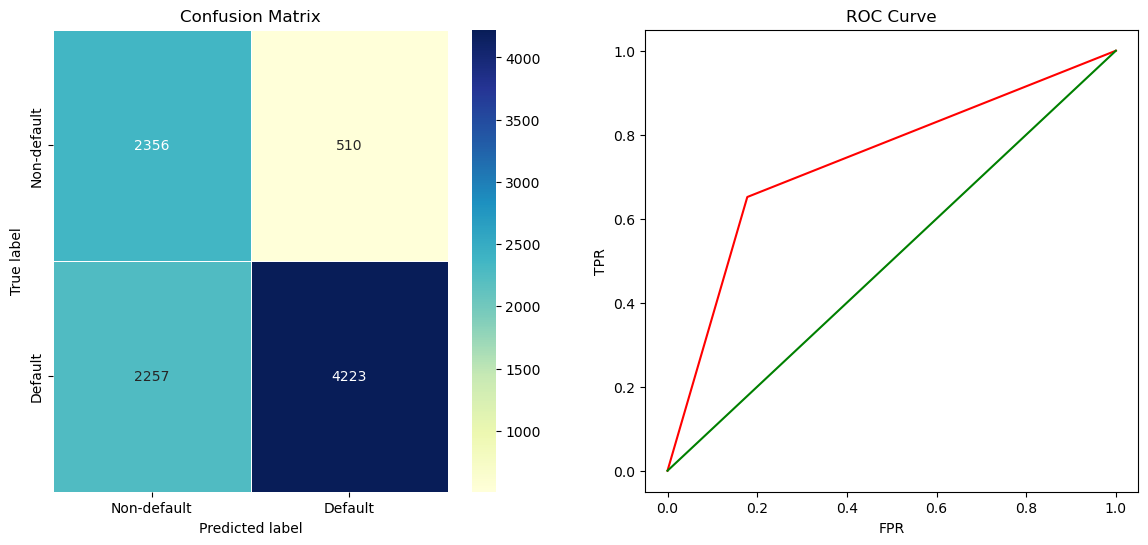

{'Train accuracy': 0.8888234979401851,
 'Test accuracy': 0.7039375133747058,
 'Precision': 0.6516975308641976,
 'Recall': 0.8922459328121699,
 'F1 Score': 0.7532328547221975}

In [40]:
model_report(xg_classifier,X_train_scaled,y_train,X_test_scaled, y_test)

In [41]:
model['XGBM']={'Train accuracy': 0.8888234979401851,
 'Test accuracy': 0.7039375133747058,
 'Precision': 0.6516975308641976,
 'Recall': 0.8922459328121699,
 'F1 Score': 0.7532328547221975}

In [42]:
logger.info('MODEL - XGBM ENDS!')

In [43]:
pd.DataFrame(model)

,Logisitic Regression,Decision Tree,Random Forest,XGBM
Train accuracy,0.733160,0.999144,0.999144,0.888823
Test accuracy,0.728012,0.706505,0.795314,0.703938
Precision,0.745133,0.699479,0.780318,0.651698
Recall,0.703571,0.737165,0.829284,0.892246
F1 Score,0.723756,0.717827,0.804056,0.753233


In [44]:
logger.info('MODEL BUILDING ENDS!')

### Compare with all other model the RandomForest is good with quite better f1 score 
### we are finalizing the RandomForest with the their parameters

In [45]:
final_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,178061.760524,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1
46724,20000.0,1,2,1,36,0,0,0,0,0,...,15733.013865,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1
46725,30000.0,2,3,1,31,1,2,2,0,0,...,343.706949,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11587.432615,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1


In [46]:
data1=final_data.copy() # copying the final data for future process

In [47]:
data1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,178061.760524,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1
46724,20000.0,1,2,1,36,0,0,0,0,0,...,15733.013865,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1
46725,30000.0,2,3,1,31,1,2,2,0,0,...,343.706949,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11587.432615,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1


### Creating one more column with the average Bill Amount
#### To check whether the included column with increase the f1 score  more
## FEATURE ENGINEERING

In [48]:
logger.info('FEATURE ENGINEERING STARTS!')

In [49]:
data1['AVG_BILL_AMT']=(data1['BILL_AMT1']+data1['BILL_AMT2']+data1['BILL_AMT3']+data1['BILL_AMT4']+data1['BILL_AMT5']+data1['BILL_AMT6'])/6

In [50]:
data1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,1284.000000
1,120000.0,2,2,2,26,0,2,0,0,0,...,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,2846.166667
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,16942.166667
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,38555.666667
4,50000.0,1,2,1,57,0,0,0,0,0,...,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,18223.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1,183890.853983
46724,20000.0,1,2,1,36,0,0,0,0,0,...,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1,15230.536271
46725,30000.0,2,3,1,31,1,2,2,0,0,...,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1,3818.809047
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1,11132.467029


In [51]:
X=data1.drop(['default'],axis=1)
Y=data1['default']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [53]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
RF_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9991439730351506
Testing Accuracy Score:  0.839396533276268
Precision on test data:  0.8567328918322296
Recall on test data:  0.819987323050919
F1 score on test data:  0.8379574651840656

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18737
           1       1.00      1.00      1.00     18645

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4816
           1       0.82      0.86      0.84      4530

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346




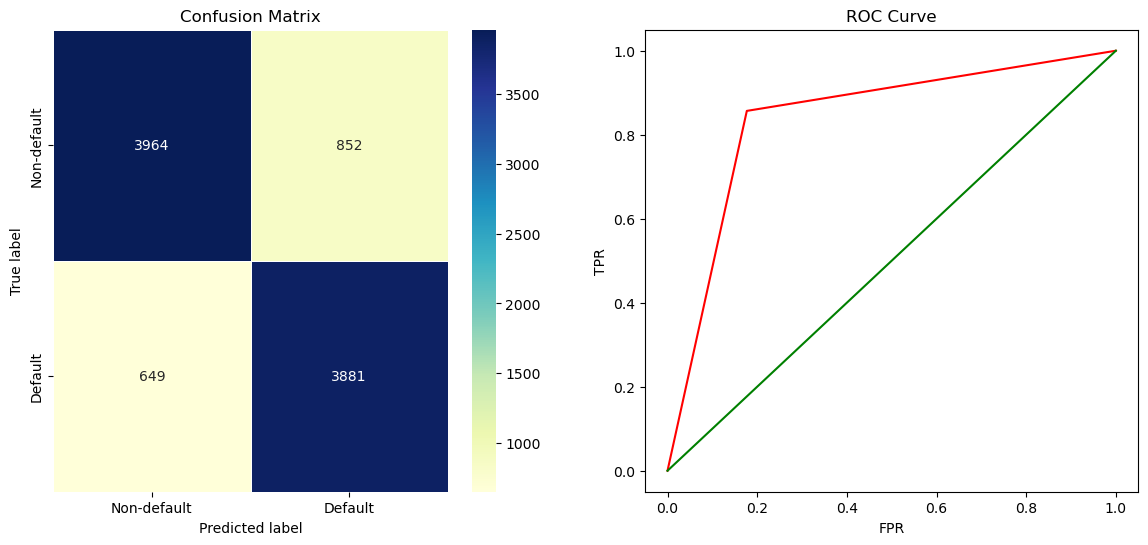

{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.839396533276268,
 'Precision': 0.8567328918322296,
 'Recall': 0.819987323050919,
 'F1 Score': 0.8379574651840656}

In [55]:
model_report(RF_classifier,X_train_scaled,y_train,X_test_scaled,y_test)

In [56]:
model['AVG bill amount']={'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.839396533276268,
 'Precision': 0.8567328918322296,
 'Recall': 0.819987323050919,
 'F1 Score': 0.8379574651840656}

### Same as above we try to create another column with Pay_1 to Pay_6

In [57]:
data2=final_data.copy()
data2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [58]:
data2['AVG PAY']=(data2['PAY_1']+data2['PAY_2']+data2['PAY_3']+data2['PAY_4']+data2['PAY_5']+data2['PAY_6'])/6

In [59]:
data2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG PAY
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,0.666667
1,120000.0,2,2,2,26,0,2,0,0,0,...,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,0.666667
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0.000000
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,0.000000
4,50000.0,1,2,1,57,0,0,0,0,0,...,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1,0.500000
46724,20000.0,1,2,1,36,0,0,0,0,0,...,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1,0.000000
46725,30000.0,2,3,1,31,1,2,2,0,0,...,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1,0.833333
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1,0.333333


In [60]:
X=data2.drop(['default'],axis=1)
Y=data2['default']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [62]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
RF_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9991439730351506
Testing Accuracy Score:  0.8392895356302161
Precision on test data:  0.8589202399466785
Recall on test data:  0.8168180857806888
F1 score on test data:  0.8373402642408491

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18743
           1       1.00      1.00      1.00     18639

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4845
           1       0.82      0.86      0.84      4501

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346




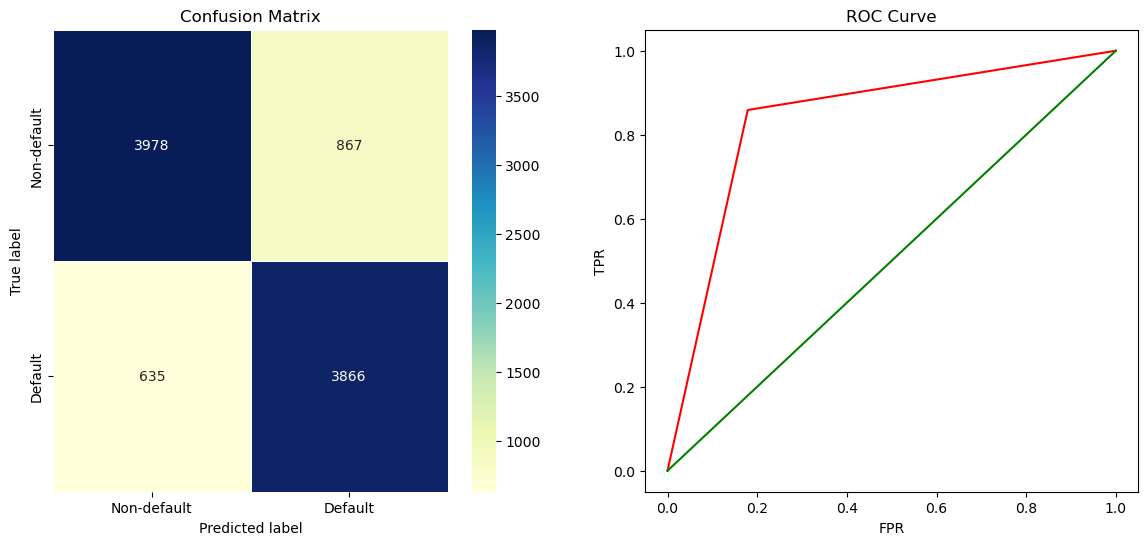

{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.8392895356302161,
 'Precision': 0.8589202399466785,
 'Recall': 0.8168180857806888,
 'F1 Score': 0.8373402642408491}

In [64]:
model_report(RF_classifier,X_train_scaled,y_train,X_test_scaled,y_test)

In [65]:
model['AVG PAY']={'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.8392895356302161,
 'Precision': 0.8589202399466785,
 'Recall': 0.8168180857806888,
 'F1 Score': 0.8373402642408491}

### Combining both bill statement and Pay column 

In [66]:
data3=final_data.copy()

In [67]:
data3['AVG_BILL_AMT']=(data3['BILL_AMT1']+data3['BILL_AMT2']+data3['BILL_AMT3']+data3['BILL_AMT4']+data3['BILL_AMT5']+data3['BILL_AMT6'])/6
data3['AVG PAY']=(data3['PAY_1']+data3['PAY_2']+data3['PAY_3']+data3['PAY_4']+data3['PAY_5']+data3['PAY_6'])/6

In [68]:
data3

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT,AVG PAY
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,1284.000000,0.666667
1,120000.0,2,2,2,26,0,2,0,0,0,...,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,2846.166667,0.666667
2,90000.0,2,2,2,34,0,0,0,0,0,...,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,16942.166667,0.000000
3,50000.0,2,2,1,37,0,0,0,0,0,...,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,38555.666667,0.000000
4,50000.0,1,2,1,57,0,0,0,0,0,...,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,18223.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1,183890.853983,0.500000
46724,20000.0,1,2,1,36,0,0,0,0,0,...,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1,15230.536271,0.000000
46725,30000.0,2,3,1,31,1,2,2,0,0,...,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1,3818.809047,0.833333
46726,50000.0,1,2,1,41,2,0,0,0,0,...,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1,11132.467029,0.333333


In [69]:
X=data3.drop(['default'],axis=1)
Y=data3['default']

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [71]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [72]:
RF_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9991439730351506
Testing Accuracy Score:  0.836828589771025
Precision on test data:  0.8559698180204173
Recall on test data:  0.8149165434185506
F1 score on test data:  0.8349388461954756

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18747
           1       1.00      1.00      1.00     18635

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4840
           1       0.81      0.86      0.83      4506

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346




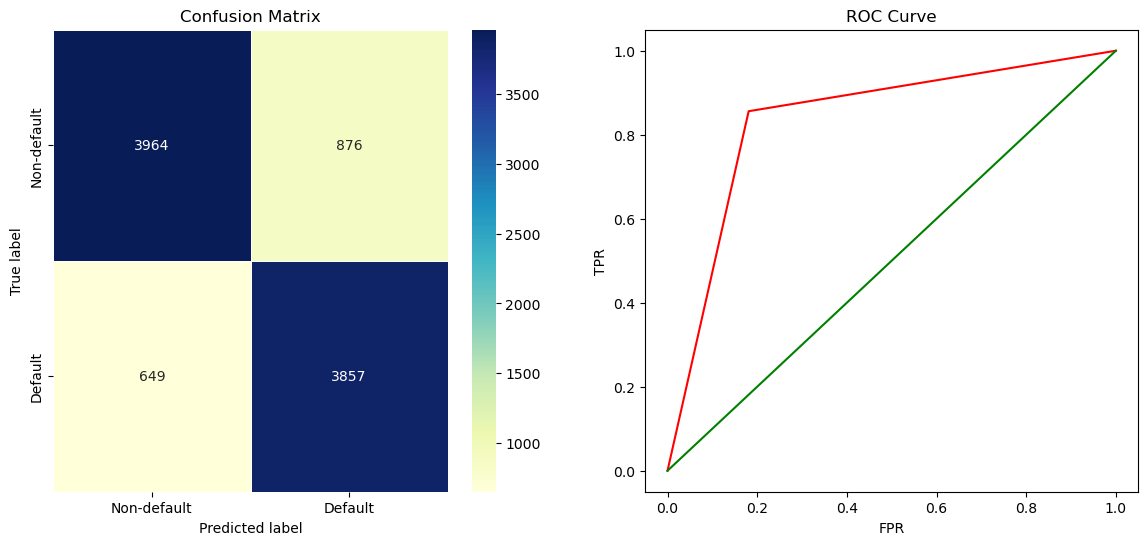

{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.836828589771025,
 'Precision': 0.8559698180204173,
 'Recall': 0.8149165434185506,
 'F1 Score': 0.8349388461954756}

In [73]:
model_report(RF_classifier,X_train_scaled,y_train,X_test_scaled,y_test)

In [74]:
model['Both Bill and Pay']={'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.836828589771025,
 'Precision': 0.8559698180204173,
 'Recall': 0.8149165434185506,
 'F1 Score': 0.8349388461954756}

In [75]:
pd.DataFrame(model)

,Logisitic Regression,Decision Tree,Random Forest,XGBM,AVG bill amount,AVG PAY,Both Bill and Pay
Train accuracy,0.733160,0.999144,0.999144,0.888823,0.999144,0.999144,0.999144
Test accuracy,0.728012,0.706505,0.795314,0.703938,0.839397,0.839290,0.836829
Precision,0.745133,0.699479,0.780318,0.651698,0.856733,0.858920,0.855970
Recall,0.703571,0.737165,0.829284,0.892246,0.819987,0.816818,0.814917
F1 Score,0.723756,0.717827,0.804056,0.753233,0.837957,0.837340,0.834939


In [76]:
logger.info('FEATURE ENGINERRING ENDS!')

### From above observation we get to know the single avg bill column provide more f1 score when compare with avg pay and both bill and pay column
#### Hence we add one more column to our data to increase the performance of our model
#### Considering the dataset where we created on bill average column

In [77]:
data1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,1284.000000
1,120000.0,2,2,2,26,0,2,0,0,0,...,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,2846.166667
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,16942.166667
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,38555.666667
4,50000.0,1,2,1,57,0,0,0,0,0,...,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,18223.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1,183890.853983
46724,20000.0,1,2,1,36,0,0,0,0,0,...,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1,15230.536271
46725,30000.0,2,3,1,31,1,2,2,0,0,...,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1,3818.809047
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1,11132.467029


#### We are finalizing the above dataset which the bill avg column
### Final Model

In [78]:
logger.info('FINAL MODEL STARTS!')

In [79]:
X=data1.drop(['default'],axis=1)
Y=data1['default']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [81]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [82]:
Randomforest=RandomForestClassifier()
Randomforest.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9991439730351506
Testing Accuracy Score:  0.8390755403381126
Precision on test data:  0.8564804592625304
Recall on test data:  0.819564758081555
F1 score on test data:  0.8376160656445693

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18743
           1       1.00      1.00      1.00     18639

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4817
           1       0.82      0.86      0.84      4529

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346




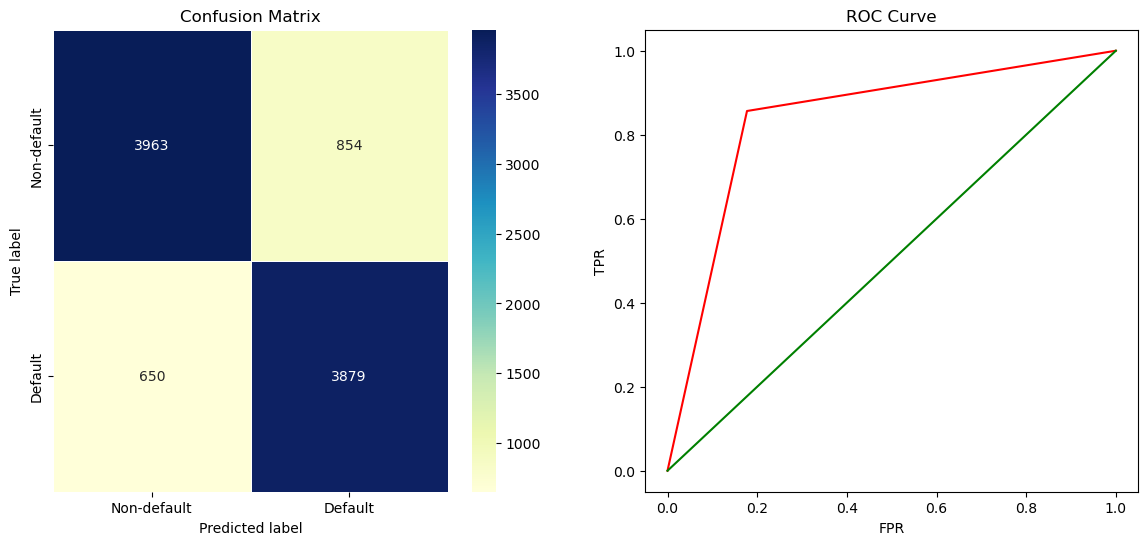

{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.8390755403381126,
 'Precision': 0.8564804592625304,
 'Recall': 0.819564758081555,
 'F1 Score': 0.8376160656445693}

In [83]:
model_report(Randomforest,X_train_scaled,y_train,X_test_scaled,y_test)

In [84]:
final=({'Scores':{'Train accuracy': 0.9991439730351506,
 'Test accuracy': 0.8390755403381126,
 'Precision': 0.8564804592625304,
 'Recall': 0.819564758081555,
 'F1 Score': 0.8376160656445693}})

In [85]:
final_model=pd.DataFrame(final)

In [86]:
final_model

,Scores
F1 Score,0.837616
Precision,0.856480
Recall,0.819565
Test accuracy,0.839076
Train accuracy,0.999144


In [87]:
logger.info(final_model)

In [88]:
logger.info('FINAL MODEL ENDS!')

In [89]:
logger.info('MODEL SAVING!')

## Importing Pickle

In [90]:
import pickle

In [91]:
pickle.dump(Randomforest, open('crdp.pkl', 'wb'))

In [92]:
pickle.dump(scaler, open('creditdefault.pkl', 'wb'))

In [93]:
import bz2 as bz2
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [94]:
compressed_pickle('crdp', Randomforest)

### Model is ready for deployment

In [95]:
logger.info('PROJECT RUNNING ENDS!')